## 1. RNN 的基本原理

### 1.1 概述
循环神经网络（Recurrent Neural Network, RNN）是一种专门用于处理序列数据的神经网络。与传统的前馈神经网络不同，RNN 具有“记忆”能力，可以捕捉时间序列中的依赖关系。

### 1.2 结构
RNN 的核心思想是通过隐藏状态（Hidden State）在时间步之间传递信息。其基本结构如下：

- **输入**：在每个时间步 $ t $，输入为 $ x_t $。
- **隐藏状态**：隐藏状态 $ h_t $ 是当前时间步的状态，由上一时间步的隐藏状态 $ h_{t-1} $ 和当前输入 $ x_t $ 计算得到。
- **输出**：每个时间步的输出 $ y_t $ 由当前隐藏状态 $ h_t $ 计算得到。

公式表示如下：
$$
h_t = \sigma(W_h h_{t-1} + W_x x_t + b_h)
$$
$$
y_t = W_y h_t + b_y
$$

其中：
- $ W_h $、$ W_x $、$ W_y $ 分别是隐藏状态、输入和输出的权重矩阵。
- $ b_h $、$ b_y $ 是偏置项。
- $ \sigma $ 是激活函数，通常使用 tanh 或 ReLU。

### 1.3 特点
- **参数共享**：RNN 在所有时间步中共享相同的权重矩阵 $ W_h $、$ W_x $ 和 $ W_y $。
- **序列建模**：RNN 能够捕捉序列中的时间依赖性。

---

## 2. 梯度消失与梯度爆炸

### 2.1 梯度消失
在 RNN 中，梯度通过时间反向传播（Backpropagation Through Time, BPTT）进行计算。由于多个时间步的梯度连乘，当梯度值小于 1 时，多次连乘会导致梯度逐渐趋近于 0，这种现象称为**梯度消失**。

梯度消失会导致模型难以学习长期依赖关系，因为远距离时间步的信息无法有效传递到当前时间步。

### 2.2 梯度爆炸
与梯度消失相反，当梯度值大于 1 时，多次连乘会导致梯度迅速增大，这种现象称为**梯度爆炸**。梯度爆炸会导致训练不稳定，甚至导致模型参数更新过大而发散。

### 2.3 解决方法
- **梯度裁剪**：对梯度设置一个阈值，防止梯度爆炸。
- **改进模型结构**：如 LSTM 和 GRU，通过引入门控机制缓解梯度消失问题。

---

## 3. GRU 

### 3.1 GRU 概述
门控循环单元（Gated Recurrent Unit, GRU）是一种改进的 RNN 结构，旨在解决传统 RNN 的梯度消失问题。GRU 通过引入**更新门**和**重置门**，控制信息的流动，从而更好地捕捉长期依赖关系。

### 3.2 GRU 的结构
GRU 的核心思想是通过两个门控机制动态调整隐藏状态的更新方式。其主要组成部分包括：

1. **更新门（Update Gate）**：控制当前隐藏状态保留多少旧信息。
2. **重置门（Reset Gate）**：控制忽略多少过去的信息。
3. **候选隐藏状态（Candidate Hidden State）**：结合重置门生成新的隐藏状态候选值。

### 3.3 GRU 的公式
GRU 的计算过程如下：

#### (1) 更新门
更新门 $ z_t $ 决定当前隐藏状态保留多少旧信息：
 - 更新门的作用是决定当前时间步的隐藏状态需要保留多少前一个时间步的信息。
 - 更新门的输出值介于0和1之间，值越大表示保留的过去信息越多，值越小则意味着更多地依赖于当前输入的信息。
 - 更新门的计算公式为：

$$
z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z)
$$

#### (2) 重置门
重置门 $ r_t $ 决定忽略多少过去的信息：
$$
r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r)
$$

#### (3) 候选隐藏状态
候选隐藏状态 $ \tilde{h}_t $ 表示新的隐藏状态候选值：
$$
\tilde{h}_t = \tanh(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h)
$$

#### (4) 隐藏状态更新
最终隐藏状态 $ h_t $ 由更新门决定如何结合旧状态和新候选状态：
$$
h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
$$

其中：
- $ \odot $ 表示逐元素乘法。
- $ \sigma $ 是 Sigmoid 激活函数。
- $ W_z, W_r, W_h $ 和 $ U_z, U_r, U_h $ 是可学习的权重矩阵。
- $ b_z, b_r, b_h $ 是偏置项。

### 3.4 GRU 的优势
- **减少参数数量**：相比 LSTM，GRU 的结构更简单，参数更少。
- **缓解梯度消失**：通过门控机制，GRU 能够更好地捕捉长期依赖关系。

---


#### 我们先来看一下数据集

数据集大小:1000
train_data:  [0.0882 0.0519 0.1126 0.2074 0.2204 0.1097 0.2375 0.2136 0.247  0.3034]
test_data:  [0.416  0.4166 0.4062 0.4212 0.5193 0.524  0.5598 0.5647 0.5123 0.6216]


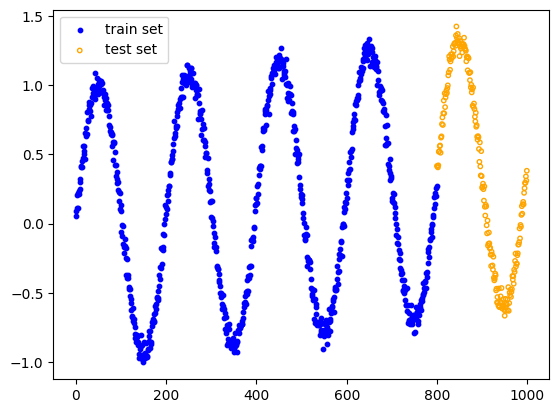

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch 
import torch.nn as nn

#导入数据集
data=np.loadtxt('sindata_1000.csv',delimiter=',')
num_data=len(data)
ratio=0.8
split=int(ratio*num_data)

print(f"数据集大小:{num_data}")

#分割数据集
train_data=np.array(data[:split])
test_data=np.array(data[split:])

print("train_data: ",train_data[:10])
print("test_data: ",test_data[:10])

#可视化
plt.figure()
plt.scatter(np.arange(split),train_data,color='blue',s=10,label='train set')
plt.scatter(np.arange(split,num_data),test_data,color='none',edgecolors='orange',s=10,label='test set')  #边缘颜色: edfecolors和填充颜色: colors
plt.legend()
plt.show()

### 这里我们整理一下训练样本

####  但是肯定有一个疑惑,为什么要加 1？

看个例子

假设我们有一个时间序列 `[a, b, c, d, e, f, g]`，并且 `seq_len = 3`。以下是具体的构造过程：

- (1) 如果不加 1 (`seq_len`)

如果我们只取长度为 `seq_len` 的子序列，那么每个样本只能提供输入序列，无法生成对应的目标序列。例如：

- 子序列 `[a, b, c]`：
  - 输入序列：`[a, b, c]`
  - 缺少目标序列，无法完成训练。

在这种情况下，模型无法学习如何从输入预测目标，因为没有明确的目标值。

---

- (2) 如果加 1 (`seq_len + 1`)

如果我们取长度为 `seq_len + 1` 的子序列，就可以同时构造输入序列和目标序列。例如：

- 子序列 `[a, b, c, d]`：
  - 输入序列：`[a, b, c]`（前 `seq_len` 个时间步）。
  - 目标序列：`[b, c, d]`（后 `seq_len` 个时间步）。

通过这种方式，我们可以确保每个样本都有对应的输入和目标。

---



In [2]:
#输入序列的长度为20。这意味着每个训练样本将由长度为20的时间步（或序列）组成。
seq_len=20  

#处理训练数据,把切分序列后多余的部分去掉  //整数除法运算符
train_num=(len(train_data)//(seq_len+1))*(seq_len+1)  #计算可以完整切分为长度为seq_len + 1的子序列的数量,并将其乘以(seq_len + 1),得到一个可以被整除的长度
train_data=np.array(train_data[:train_num]).reshape(-1,seq_len+1,1)  #-1表示自动计算 即自适应 len(train_data)//(seq_len+1))

#设置 NumPy 和 PyTorch 的随机种子
np.random.seed(0)
torch.manual_seed(0) 

#print("train_data:",train_data[:10])

x_train=train_data[:,:seq_len]    #形状为(num_data,seq_len,input_size)
y_train=train_data[:,1:seq_len+1]

#print("x_train: ",x_train[:1])
#print("y_train: ",y_train[:1])

print(f"训练序列数:{len(x_train)}")

# 转为PyTorch张量
x_train = torch.from_numpy(x_train).to(torch.float32)
y_train = torch.from_numpy(y_train).to(torch.float32)
x_test = torch.from_numpy(test_data[:-1]).to(torch.float32) #测试数据通常不需要像训练数据那样分成多个小块，而是直接使用整个测试序列。
y_test = torch.from_numpy(test_data[1:]).to(torch.float32)



训练序列数:38


#### 如下定义了一个GRU和一个全连接层
  - **GRU模块** ：负责提取时间序列中的特征
  - **全连接层(MLP)** ：将 GRU 提取的特征映射到目标输出。

#### 参数

- GRU 模块

  - `input_size` 输入数据的特征维度（每个时间步的特征数）

  - `output_size` 输出数据的维度（例如预测的目标值的维度）
 
  - `hidden_size` GRU 隐藏层的维度（即隐藏状态的大小） 

- 全连接层（MLP）
  
  - `hidden_size` 输入特征的维度（与 GRU 的隐藏状态维度一致）
  
  - `output_size` 输出特征的维度（即最终预测值的维度）

In [3]:
class GRU(nn.Module):
    #包含Pytorch的GRU和拼接的MLP
    def __init__(self, input_size,output_size,hidden_size):
        super().__init__()
        #GRU模块
        self.gru=nn.GRU(input_size=input_size,hidden_size=hidden_size)
        #将中间变量映射到预测输出的MLP
        self.linear=nn.Linear(hidden_size,output_size)
    
    def forward(self,x,hidden):
        # 前向传播
        # x的维度为(batch_size, seq_len, input_size)
        # GRU模块接受的输入为(seq_len, batch_size, input_size)
        # 因此需要对x进行变换
        # transpose函数可以交换x的坐标轴
        # out的维度是(seq_len, batch_size, hidden_size)
        out, hidden = self.gru(torch.transpose(x, 0, 1), hidden)  #将输入数据x的维度转换为(seq_len,batch_size,input_size)
        # 取序列最后的中间变量输入给全连接层
        out = self.linear(out.view(-1, hidden_size))
        return out, hidden

In [4]:
# 超参数
input_size = 1 # 输入维度
output_size = 1 # 输出维度
hidden_size = 16 # 中间变量维度
learning_rate = 5e-4

#初始化网络
gru=GRU(input_size,output_size,hidden_size)
gru_optim=torch.optim.Adam(gru.parameters(),lr=learning_rate)

#GRU测试函数，x和hidden分别是初始的输入和中间变量

def test_gru(gru,x,hidden,pred_steps):
    pred=[]
    inp=x.view(-1,input_size)
    for i in range(pred_steps):
        gru_pred,hidden=gru(inp,hidden)
        pred.append(gru_pred.detach())
        inp=gru_pred
    return torch.concat(pred).reshape(-1)
        

In [5]:
# MLP的超参数
hidden_1 = 32
hidden_2 = 16
mlp = nn.Sequential(
    nn.Linear(input_size, hidden_1),
    nn.ReLU(),
    nn.Linear(hidden_1, hidden_2),
    nn.ReLU(),
    nn.Linear(hidden_2, output_size)
)
mlp_optim = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

# MLP测试函数，相比于GRU少了中间变量
def test_mlp(mlp, x, pred_steps):
    pred = []
    inp = x.view(-1, input_size)
    for i in range(pred_steps):
        mlp_pred = mlp(inp)
        pred.append(mlp_pred.detach())
        inp = mlp_pred
    return torch.concat(pred).reshape(-1)

#### `ZIP`

  - `zip` 是 Python 的内置函数，用于将多个可迭代对象（如列表、数组等）按顺序配对。

``` python

x_train = [1, 2, 3]
y_train = [4, 5, 6]
for X, y in zip(x_train, y_train):
    print(X, y)

``` 
output

``` python
1 4
2 5
3 6

```

In [ ]:
max_epoch = 150
criterion = nn.functional.mse_loss
hidden = None # GRU的中间变量

# 训练损失
gru_losses = []
mlp_losses = []
gru_test_losses = []
mlp_test_losses = []
# 开始训练
with tqdm(range(max_epoch)) as pbar:
    for epoch in pbar:
        st = 0
        gru_loss = 0.0
        mlp_loss = 0.0
        # 随机梯度下降
        for X, y in zip(x_train, y_train):
            # 更新GRU模型
            # 我们不需要通过梯度回传更新中间变量
            # 因此将其从有梯度的部分分离出来
            if hidden is not None:
                hidden.detach_()
            gru_pred, hidden = gru(X[None, ...], hidden)    # X[None, ...]的作用是在X的最前面增加一个新的维度。   X[seq_step,1]
            gru_train_loss = criterion(gru_pred.view(y.shape), y)
            gru_optim.zero_grad()
            gru_train_loss.backward()
            gru_optim.step()
            gru_loss += gru_train_loss.item()
            # 更新MLP模型
            # 需要对输入的维度进行调整，变成(seq_len, input_size)的形式
            mlp_pred = mlp(X.view(-1, input_size))
            mlp_train_loss = criterion(mlp_pred.view(y.shape), y)
            mlp_optim.zero_grad()
            mlp_train_loss.backward()
            mlp_optim.step()
            mlp_loss += mlp_train_loss.item()
        
        gru_loss /= len(x_train)
        mlp_loss /= len(x_train)
        gru_losses.append(gru_loss)
        mlp_losses.append(mlp_loss)
        
        # 训练和测试时的中间变量序列长度不同，训练时为seq_len，测试时为1
        gru_pred = test_gru(gru, x_test[0], hidden[:, -1], len(y_test))
        mlp_pred = test_mlp(mlp, x_test[0], len(y_test))
        gru_test_loss = criterion(gru_pred, y_test).item()
        mlp_test_loss = criterion(mlp_pred, y_test).item()
        gru_test_losses.append(gru_test_loss)
        mlp_test_losses.append(mlp_test_loss)
        
        pbar.set_postfix({
            'Epoch': epoch,
            'GRU loss': f'{gru_loss:.4f}',
            'MLP loss': f'{mlp_loss:.4f}',
            'GRU test loss': f'{gru_test_loss:.4f}',
            'MLP test loss': f'{mlp_test_loss:.4f}'
        })

100%|██████████| 150/150 [00:19<00:00,  7.60it/s, Epoch=149, GRU loss=0.0034, MLP loss=0.0056, GRU test loss=0.0392, MLP test loss=1.1252]


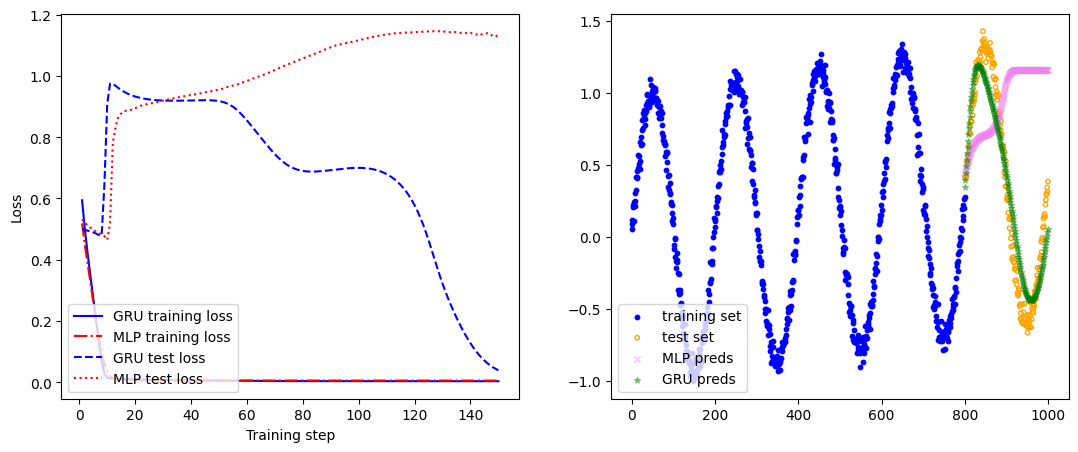

In [7]:
# 最终测试结果
gru_preds = test_gru(gru, x_test[0], hidden[:, -1], len(y_test)).numpy()
mlp_preds = test_mlp(mlp, x_test[0], len(y_test)).numpy()

plt.figure(figsize=(13, 5))

# 绘制训练曲线
plt.subplot(121)
x_plot = np.arange(len(gru_losses)) + 1
plt.plot(x_plot, gru_losses, color='blue', 
    label='GRU training loss')
plt.plot(x_plot, mlp_losses, color='red', 
    ls='-.', label='MLP training loss')
plt.plot(x_plot, gru_test_losses, color='blue', 
    ls='--', label='GRU test loss')
plt.plot(x_plot, mlp_test_losses, color='red', 
    ls=':', label='MLP test loss')
plt.xlabel('Training step')
plt.ylabel('Loss')
plt.legend(loc='lower left')

# 绘制真实数据与模型预测值的图像
plt.subplot(122)
plt.scatter(np.arange(split), data[:split], color='blue', 
    s=10, label='training set')
plt.scatter(np.arange(split, num_data), data[split:], color='none', 
    edgecolor='orange', s=10, label='test set')
plt.scatter(np.arange(split, num_data - 1), mlp_preds, color='violet', 
    marker='x', alpha=0.4, s=20, label='MLP preds')
plt.scatter(np.arange(split, num_data - 1), gru_preds, color='green', 
    marker='*', alpha=0.4, s=20, label='GRU preds')
plt.legend(loc='lower left')
plt.savefig('output_20_0.png')
plt.savefig('output_20_0.pdf')
plt.show()